# Acces vision notebook

### Ce notebook a pour but de présenter le model de détection d'objet du prototype pour projet Access Vision


Le modèle a été entrainé sur un dataset qui a été constitué par l'assemblage de plusieurs datasets sur [Robflow](https://roboflow.com/).Roboflow est une plateforme utilisée pour gérer, annoter, prétraiter et entraîner des modèles de vision par ordinateur. Les datasets disponibles sur la plateformes sont créer par des utilisateurs de plateforme.
Nous avons choisis 3 datasets qui sont chacun dédié à la reconnaissance d'un obstacle : poteau, poubelle, escalier.
Nous avons fusionnner ces datasets et appliquer des phases d'augmentation pour équilibrer le dataset final.

Nous allons tester dans ce notebook le modèle entrainé.

## Install YOLOv8




In [9]:
# Pip install method (recommended)

%cd HOME

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()


Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.4.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.1/225.8 GB disk)


In [10]:
from ultralytics import YOLO

##Download the dataset via roboflow



In [11]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="qtpmHzxmLh3Ibv6IcOIc")
project = rf.workspace("esera").project("blind-assit-walk-street-complete")
version = project.version(2)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to blind-assit-walk-street-complete-2 in yolov8:: 100%|██████████| 7160/7160 [00:04<00:00, 1537.77it/s]


## Inference with Custom Model

⚠️ télèchargez le fichier best.pt depuis github et importez le dossier home ou mettez à jour le chemin vers le fichier (model={HOME}/best.pt)

In [16]:

import os
import random

# Chemin du dossier contenant les images
image_folder = '/content/blind-assit-walk-street-complete-2/test/images'

# Récupérer la liste des fichiers dans le dossier
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Sélectionner aléatoirement 10 images
selected_images = random.sample(image_files, 10)
for image in selected_images:
    image_path = os.path.join(image_folder, image)

    yolo_command = f"yolo task=detect mode=predict model=best.pt conf=0.60 source={image_path} save=True"

    os.system(yolo_command)

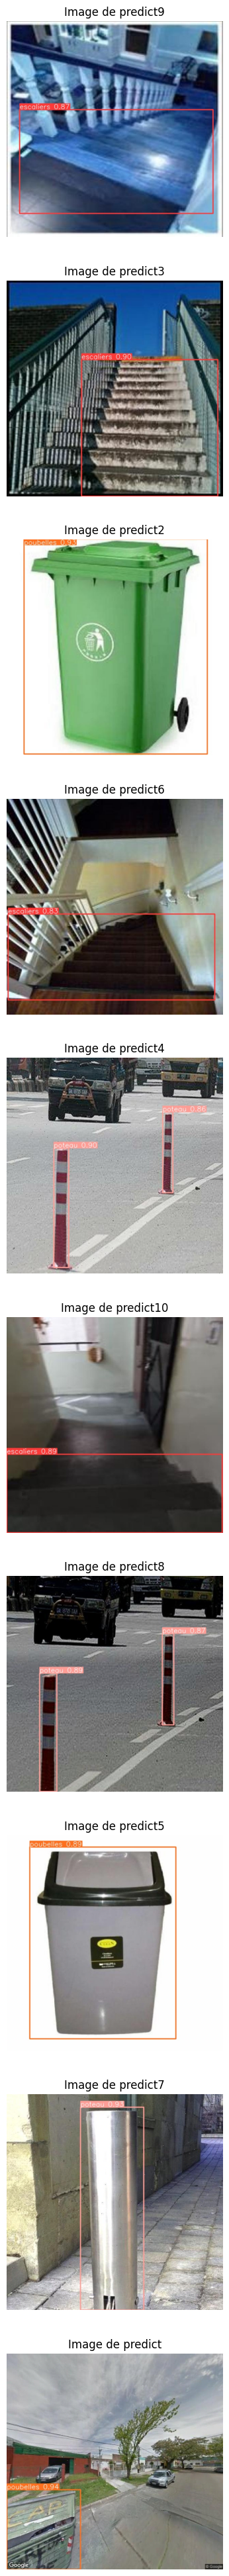

In [17]:
import os
import cv2
import matplotlib.pyplot as plt

main_folder = '/home/runs/detect'


sub_folders = [f for f in os.listdir(main_folder) if os.path.isdir(os.path.join(main_folder, f)) and f.startswith('predict')]

plt.figure(figsize=(90, 50))

# Boucle pour charger et afficher une image de chaque sous-dossier
for i, sub_folder in enumerate(sub_folders):

    folder_path = os.path.join(main_folder, sub_folder)

    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

    if image_files:

        image_path = os.path.join(folder_path, image_files[0])
        image = cv2.imread(image_path)


        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


        plt.subplot(len(sub_folders), 1, i+1)
        plt.imshow(image_rgb)
        plt.title(f"Image de {sub_folder}")
        plt.axis("off")

# Afficher la figure complète
plt.show()
